In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

In [4]:
# trajectory path
xtc_filename_A='../Inputs/A/traj_comp.xtc'
xtc_filename_B='../Inputs/B/traj_comp.xtc'
# topology path
gro_filename_A = '../Inputs/A/confout.gro'
gro_filename_B = '../Inputs/B/confout.gro'
# COLVAR path
colvar_filename_A='../Inputs/A/COLVAR.txt'
colvar_filename_B='../Inputs/B/COLVAR.txt'
# load trajectory
xtc_A = md.load(xtc_filename_A, top=gro_filename_A)
xtc_B = md.load(xtc_filename_B, top=gro_filename_B)
# load COLVAR
colvar_A = np.loadtxt(colvar_filename_A)
colvar_B = np.loadtxt(colvar_filename_B)

In [5]:
# check the shape of the trajectory
print('check the shape of the trajectory')
print('xtc_A', xtc_A.xyz.shape)
print('xtc_B', xtc_B.xyz.shape)
# check the shape of the COLVAR
print('check the shape of the COLVAR')
print('colvar_A', colvar_A.shape)
print('colvar_B', colvar_B.shape)
# check the frame number of the trajectory
print('check the frame number of the trajectory')
print('xtc_A', xtc_A.n_frames)
print('xtc_B', xtc_B.n_frames)
# check the frame number of the COLVAR
print('check the frame number of the COLVAR')
print('colvar_A', colvar_A.shape[0])
print('colvar_B', colvar_B.shape[0])

check the shape of the trajectory
xtc_A (100001, 22, 3)
xtc_B (100001, 22, 3)
check the shape of the COLVAR
colvar_A (100001, 3)
colvar_B (100001, 3)
check the frame number of the trajectory
xtc_A 100001
xtc_B 100001
check the frame number of the COLVAR
colvar_A 100001
colvar_B 100001


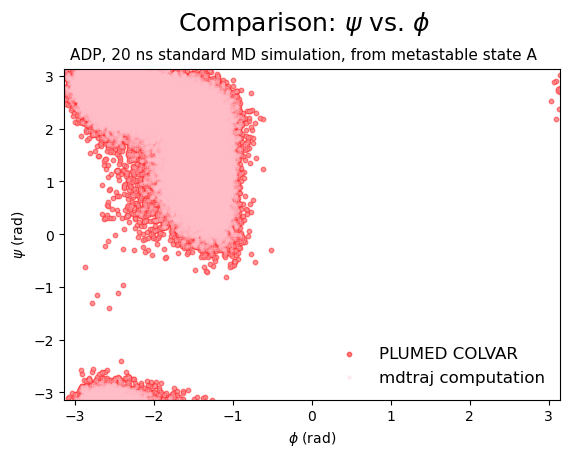

In [16]:
# figure 1 - plot phi_vs_psi, compare xtc_A and colvar_A
fig=plt.figure(1)

# load phi and psi from colvar_A
phi_colvar_A = colvar_A[:,1]
psi_colvar_A = colvar_A[:,2]
# load phi and psi from xtc_A
phi_xtc_A = md.compute_phi(xtc_A)[1]
psi_xtc_A = md.compute_psi(xtc_A)[1]

# settings for the scatter plot
# colorblind-friendly color, the overlap is also colorblind-friendly
color1 = 'r'
color2 = 'pink'
# alpha setting
alpha1 = 0.5
alpha2 = 0.25


# plot every Nth frame
N=1

# plot phi_vs_psi from colvar_A, scatter plot, colorblind friendly, y is psi, x is phi
plt.scatter(phi_colvar_A[::N], psi_colvar_A[::N], color=color1, alpha=alpha1, marker=marker1, s=size1, label='PLUMED COLVAR')
# plot legend, righttop, fontsize 12
plt.legend(loc='lower right', fontsize=12, frameon=False)
# plot phi_vs_psi from xtc_A, scatter plot, colorblind friendly, y is psi, x is phi
plt.scatter(phi_xtc_A[::N], psi_xtc_A[::N], color=color2, alpha=alpha2, marker=marker2, s=size2, label='mdtraj computation')
# plot legend, righttop, fontsize 12
plt.legend(loc='lower right', fontsize=12, frameon=False)

# set axis range
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)

# labels, unit rad, fontsize 12
plt.xlabel(r'$\phi$ (rad)', )
plt.ylabel(r'$\psi$ (rad)', )

# two lines of title
plt.text(x=0.5, y=0.88, s="Comparison: "r"$\psi$"" vs. ""$\phi$", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "ADP, 20 ns standard MD simulation, from metastable state A", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
 

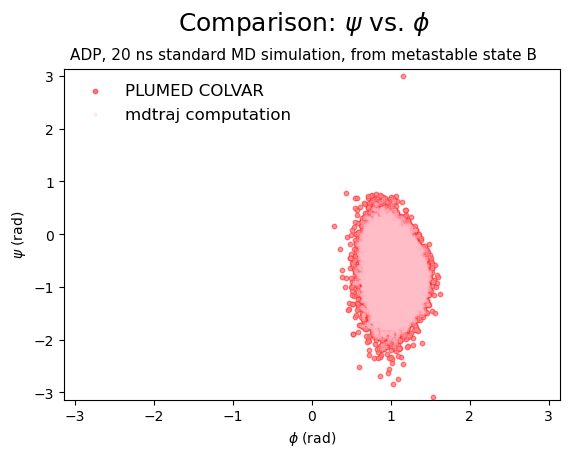

In [17]:
# figure 2 - plot phi_vs_psi, compare xtc_B and colvar_B
fig=plt.figure(2)

# load phi and psi from colvar_B
phi_colvar_B = colvar_B[:,1]
psi_colvar_B = colvar_B[:,2]
# load phi and psi from xtc_B
phi_xtc_B = md.compute_phi(xtc_B)[1]
psi_xtc_B = md.compute_psi(xtc_B)[1]

# colorblind-friendly color, the overlap is also colorblind-friendly
color1 = 'r'
color2 = 'pink'
# alpha setting
alpha1 = 0.5
alpha2 = 0.25

size2 = 5
# plot every Nth frame
N=1

# plot phi_vs_psi from colvar_B, scatter plot, colorblind friendly, y is psi, x is phi
plt.scatter(phi_colvar_B[::N], psi_colvar_B[::N], color=color1, alpha=alpha1, marker=marker1, s=size1, label='PLUMED COLVAR')
# plot legend, righttop, fontsize 12
plt.legend(loc='upper left', fontsize=12, frameon=False)
# plot phi_vs_psi from xtc_B, scatter plot, colorblind friendly, y is psi, x is phi
plt.scatter(phi_xtc_B[::N], psi_xtc_B[::N], color=color2, alpha=alpha2, marker=marker2, s=size2, label='mdtraj computation')
# plot legend, righttop, fontsize 12
plt.legend(loc='upper left', fontsize=12, frameon=False)

# set axis range
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)

# labels, unit rad, fontsize 12
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel(r'$\psi$ (rad)')

# two lines of title
plt.text(x=0.5, y=0.88, s="Comparison: "r"$\psi$"" vs. ""$\phi$", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "ADP, 20 ns standard MD simulation, from metastable state B", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)


In [19]:
# compute standard deviation of phi and psi from colvar_A
phi_colvar_A_std = np.std(phi_colvar_A)
psi_colvar_A_std = np.std(psi_colvar_A)
# compute standard deviation of phi and psi from xtc_A
phi_xtc_A_std = np.std(phi_xtc_A)
psi_xtc_A_std = np.std(psi_xtc_A)
# compute standard deviation of phi and psi from colvar_B
phi_colvar_B_std = np.std(phi_colvar_B)
psi_colvar_B_std = np.std(psi_colvar_B)
# compute standard deviation of phi and psi from xtc_B
phi_xtc_B_std = np.std(phi_xtc_B)
psi_xtc_B_std = np.std(psi_xtc_B)

In [20]:
# metastable state A
print('20 ns standard MD simulation (i.e. bias factor = 1) start from metastable state A')
# print standard deviation
# phi
print('\n(1) phi standard deviation')
print('PLUMED COLVAR: phi standard deviation = ', phi_colvar_A_std, 'rad')
print('mdtraj computation: phi standard deviation = ', phi_xtc_A_std, 'rad')
# phi relative error between colvar and xtc
print('phi relative error = ', (phi_colvar_A_std - phi_xtc_A_std)/phi_colvar_A_std)

# psi
print('\n(2) psi standard deviation')
print('PLUMED COLVAR: psi standard deviation = ', psi_colvar_A_std, 'rad')
print('mdtraj computation: psi standard deviation = ', psi_xtc_A_std, 'rad')
# psi relative error between colvar and xtc
print('psi relative error = ', (psi_colvar_A_std - psi_xtc_A_std)/psi_colvar_A_std)

# metastable state B
print('\n\n20 ns standard MD simulation (i.e. bias factor = 1) start from metastable state B')
# print standard deviation
# phi
print('\n(1) phi standard deviation')
print('PLUMED COLVAR: phi standard deviation = ', phi_colvar_B_std, 'rad')
print('mdtraj computation: phi standard deviation = ', phi_xtc_B_std, 'rad')
# phi relative error between colvar and xtc
print('phi relative error = ', (phi_colvar_B_std - phi_xtc_B_std)/phi_colvar_B_std)

# psi
print('\n(2) psi standard deviation')
print('PLUMED COLVAR: psi standard deviation = ', psi_colvar_B_std, 'rad')
print('mdtraj computation: psi standard deviation = ', psi_xtc_B_std, 'rad')
# psi relative error between colvar and xtc
print('psi relative error = ', (psi_colvar_B_std - psi_xtc_B_std)/psi_colvar_B_std)

20 ns standard MD simulation (i.e. bias factor = 1) start from metastable state A

(1) phi standard deviation
PLUMED COLVAR: phi standard deviation =  0.5538100218279401 rad
mdtraj computation: phi standard deviation =  0.55381006 rad
phi relative error =  -6.897007967098976e-08

(2) psi standard deviation
PLUMED COLVAR: psi standard deviation =  1.0461852618514416 rad
mdtraj computation: psi standard deviation =  1.0461853 rad
psi relative error =  6.500552655132104e-09


20 ns standard MD simulation (i.e. bias factor = 1) start from metastable state B

(1) phi standard deviation
PLUMED COLVAR: phi standard deviation =  0.13210024266183035 rad
mdtraj computation: phi standard deviation =  0.13210024 rad
phi relative error =  2.4721643241914923e-08

(2) psi standard deviation
PLUMED COLVAR: psi standard deviation =  0.3425192331996315 rad
mdtraj computation: psi standard deviation =  0.34251925 rad
psi relative error =  -5.924550176371829e-08
